# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Dwi Prastiana
- **Email:** saturdayinsaturnus@gmail.com
- **ID Dicoding:** dwi_prastiana

## Menentukan Pertanyaan Bisnis

- Pada musim apa program berbagi sepeda ini paling banyak dan paling sedikit disewa ?
- di jam berapa penyewa paling banyak ?
- Apakah cuaca mempengaruhi banyaknya perjalanan dengan sepeda ?

## Import Semua Packages/Library yang Digunakan

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

Sistem berbagi sepeda adalah generasi baru persewaan sepeda tradisional di mana seluruh proses mulai dari keanggotaan, penyewaan, dan pengembaliannya menjadi otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari suatu tempat dan mengembalikannya di tempat lain. Saat ini, terdapat sekitar lebih dari 500 program berbagi sepeda di seluruh dunia yang terdiri dari
lebih dari 500 ribu sepeda. Sekarang, terdapat minat yang besar terhadap penggunaan sistem ini karena peran pentingnya dalam lalu lintas,
masalah lingkungan dan kesehatan.

Terlepas dari banyaknya minat terhadap penerapan sistem berbagi sepeda di dunia nyata, karakteristik data yang dihasilkan oleh
sistem ini membuatnya menarik untuk penelitian. Berbeda dengan layanan transportasi lain seperti bus atau kereta bawah tanah, durasi perjalanan, posisi keberangkatan dan kedatangan dicatat secara eksplisit dalam sistem ini. Fitur ini mengubah sistem berbagi sepeda menjadi
jaringan sensor virtual yang dapat digunakan untuk merasakan mobilitas dalam kota. Oleh karena itu, diharapkan banyak peristiwa yang terjadi di dalam kota dapat dideteksi melalui pemantauan data ini.

**Data Set**

Proses penyewaan sepeda memiliki hubungan yang erat dengan kondisi lingkungan dan musim. Misalnya, kondisi cuaca,
curah hujan, hari, musim, jam, dan sebagainya dapat mempengaruhi perilaku sewa. Kumpulan data ini merupakan
catatan riwayat selama dua tahun yaitu tahun 2011 dan 2012 dari Sistem Capital Bikeshare, Washington D.C., AS yang
tersedia bagi umum di http://capitalbikeshare.com/system-data. Kami mengumpulkan data setiap dua jam per hari, lalu
mengekstraksi dan menambahkan informasi cuaca dan musiman yang sesuai. Informasi cuaca diambil dari http://www.freemeteo.com.

**Data Terkait**
- Regresi : Prediksi jumlah sewa sepeda setiap jam atau harian berdasarkan keadaan lingkungan dan musim.
- Deteksi Peristiwa dan Anomali : Jumlah sepeda sewaan juga berkorelasi dengan beberapa peristiwa yang terjadi di kota yang mana mudah dilacak melalui mesin pencari. Misalnya, data pada "30-10-2012 washington d.c." di Google menampilkan hasil terkait Badai Sandy. Beberapa peristiwa penting tersebut dapat diidentifikasi. Oleh karena itu, data dapat digunakan untuk validasi algoritma deteksi anomali atau peristiwa juga.

**File**
- Readme.txt
- hour.csv : jumlah sepeda yang disewa per jam. Tercatat: 17379 jam
- day.csv : jumlah sepeda yang disewa per hari. Tercatat: 731 hari

**Karakteristik Dataset**
Kedua table hour.csv dan day.csv memuat field yang sama, kecuali data jam tidak terdapat dalam file day.csv.
- instant: record index
- dteday : tanggal
- season : musim (1:semi, 2:panas, 3:gugur, 4:dingin)
- yr : tahun (0: 2011, 1:2012)
- mnth : bulan ( 1 to 12)
- hr : jam (0 sampai 23)
- holiday : cuaca yang terjadi baik saat hari libur atau tidak  (diambil dari http://dchr.dc.gov/page/holiday-schedule)
- weekday : hari dalam 1 minggu
- workingday : jika hari libur atau weekend bernilai 1, selain itu 0.
	+ kategori cuaca :
		- 1: Cerah, Sedikit Berawan, Sebagian Berawan, Sebagian Berawan
		- 2: Sedikit Berkabut + Berawan, Sedikit Berkabut + Mendung, Sedikit Berkabut + Sedikit Berawan, Sedikit Berkabut
		- 3: Bersalju Ringan, Hujan Ringan + Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
		- 4: Hujan Lebat + Es + Petir + Berkabut, Bersalju + Berkabut
	- temp : suhu yang diukur dalam satuan Celcius. Nilai terbagi sampai dengan 41 (maksimal)
	- atemp: suhu yang dirasakan dalam satuan Celcius. Nilai terbagi sampai dengan 50 (maksimal)
	- hum: Kelembaban. Nilai terbagi sampai dengan 100 (maksimal)
	- windspeed: Kecepatan angin. Nilai terbagi sampai dengan 67 (maksimal)
	- casual: jumlah pengguna biasa
	- registered: jumlah pengguna yang teregistrasi
	- cnt: jumlah total pengguna biasa dan yang teregistrasi

**License**
Use of this dataset in publications must be cited to the following publication:
 Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

### Gathering Data

In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [5]:
day_df = pd.read_csv('day.csv')
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


### Assessing Data

In [6]:
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


dari hasil di atas, dapat terlihat bawah tabel hour tidak memiliki missing value dan nilai yang terduplikasi.

In [7]:
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


dari hasil di atas, dapat terlihat bawah tabel day tidak memiliki missing value dan nilai yang terduplikasi.

In [8]:
print(hour_df.shape)
print(day_df.shape)

(17379, 17)
(731, 16)


Dari hasil assesment didapatkan
1. Data hour terdiri dari 17379 baris dan 17 kolom, data day terdiri dari 731 baris dan  16 kolom,
2. Karakteristik data untuk variable temp, atemp, hum dan windspeed sama seperti yang telah disebutkan sebelumnya,
3. variable dteday dikonversi ke date type,
4. nilai variabel season, weekday, dan mth diubah menjadi tipe integer
5. nilai variabel yr yang berisi 0 untuk 2011 dan 1 untuk 2012 akan diubah sesuai dengan tahunnya.


### Cleaning Data

In [9]:
import datetime
import calendar
# konversi dteday table hour variable menjadi date data type
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# konversi dteday table day variable menjadi date data type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memperbaiki nilai dari varibale season, weekday dan mnth

In [11]:
# find the weekday of each corresponding date
hour_df['weekday'] = hour_df['dteday'].dt.day_name()
hour_df['mnth'] = hour_df['dteday'].dt.month_name()
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [12]:
# find the weekday of each corresponding date
day_df['weekday'] = day_df['dteday'].dt.day_name()
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [13]:
# mengubah nilai season integer menjadi nilai korespondensi
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)

hour_df['season'] = season_list

In [14]:
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [15]:
# mengubah nilai season integer menjadi nilai korespondensi
def find_season(season):
    season_string = {1:'Winter', 2:'Spring', 3:'Summer', 4:'Fall'}
    return season_string.get(season)

season_list = []

for season in day_df['season']:
    season = find_season(season)
    season_list.append(season)

day_df['season'] = season_list

day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


In [16]:
hour_df['yr'] = hour_df['dteday'].dt.year
hour_df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [17]:
day_df['yr'] = day_df['dteday'].dt.year
day_df.head(3)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349


memperbaiki nilai var temp, atemp, hum dan windspeed

In [18]:
hour_df['temp'] = hour_df['temp']*41
hour_df['atemp'] = hour_df['atemp']*50
hour_df['hum'] = hour_df['hum']*100
hour_df['windspeed'] = hour_df['windspeed']*67

day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['hum'] = day_df['hum']*100
day_df['windspeed'] = day_df['windspeed']*67

setelah itu data disimpan dengan nama baru agar lebih mudah digunakan

In [19]:
hour_df.to_csv("cleaned_bikesharing_hour.csv", index=False)
day_df.to_csv("cleaned_bikesharing_day.csv", index=False)

## Exploratory Data Analysis (EDA)

In [20]:
hour_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [21]:
day_df.dtypes

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

### Explore ...

In [22]:
# mengekstraksi 4 variable bertipe data float
float_vars = ['temp', 'atemp', 'hum', 'windspeed']
df_float = hour_df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


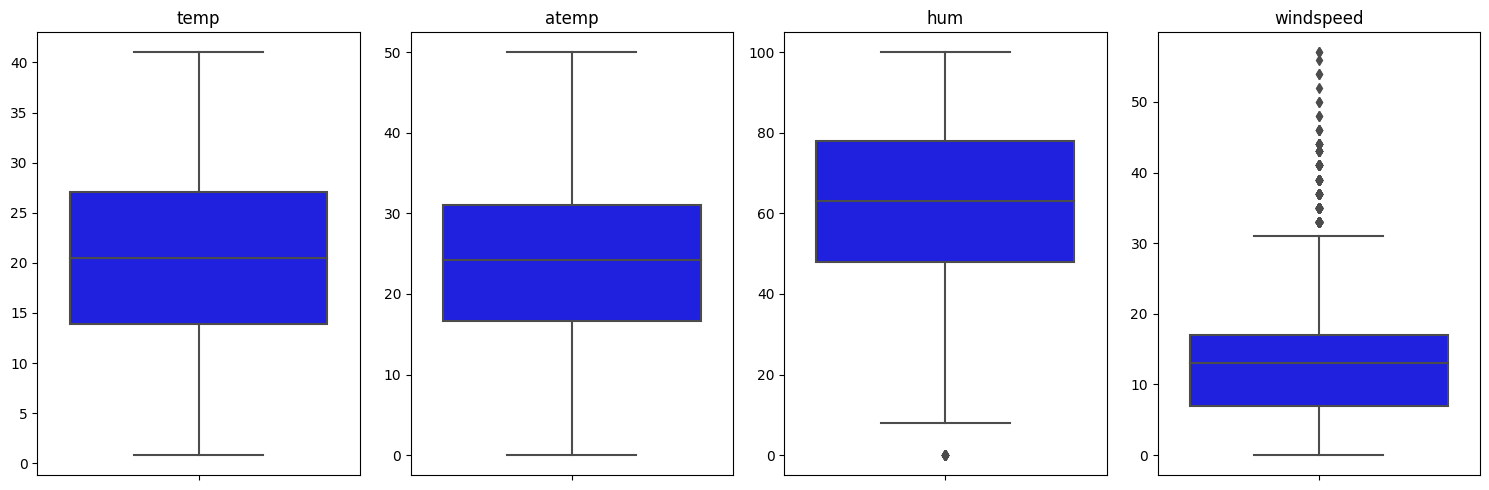

In [23]:
# membuat gambar dan 4 subplot
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

# mengiterasi variable bertipe float dan membuat boxplot untuk masing-masing
for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='blue')

    # memberi judul dan label
    ax.set_title(float_vars[i])
    ax.set_ylabel("")

# merapikan layout plot
plt.tight_layout()

# Show the plot
plt.show()

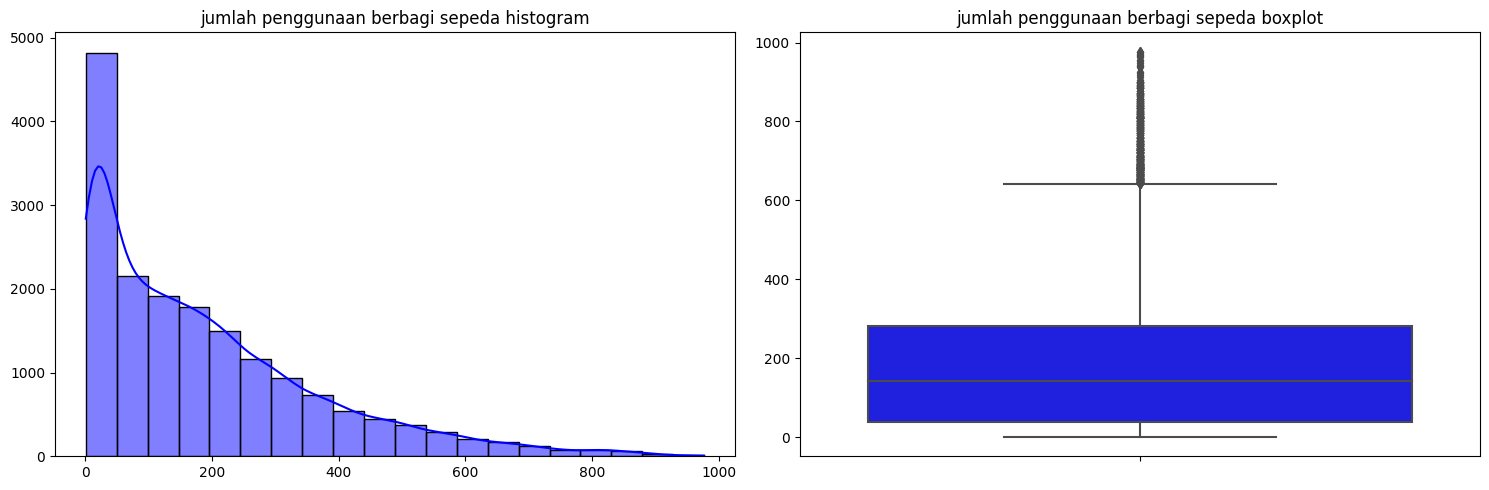

In [24]:
# membuat gambar dengan 2 subplot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))


sns.histplot(hour_df['cnt'], kde=True, bins=20, ax = axs[0], color='blue')
axs[0].set_title("jumlah penggunaan berbagi sepeda histogram")
axs[0].set_xlabel("")
axs[0].set_ylabel("")

sns.boxplot(y=hour_df['cnt'], ax = axs[1], color='blue')
axs[1].set_title("jumlah penggunaan berbagi sepeda boxplot")
axs[1].set_xlabel("")
axs[1].set_ylabel("")


# merapikan layout dengan subplot
plt.tight_layout()

# Show the plot
plt.show()

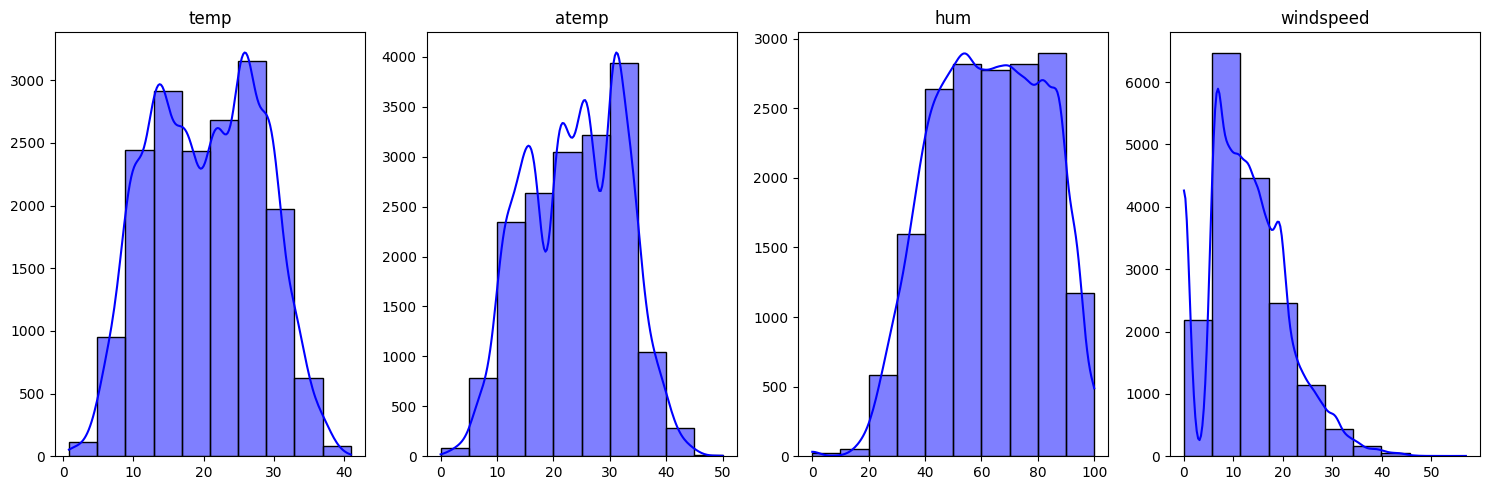

In [25]:
# membuat gambar dan 4 subplot
fig, axs = plt.subplots(1, 4, figsize=(15,5))

# iterasi dengan variable bertipe float dan membuat diagram histogramnya masing-masing
for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=10, color='blue')

    # judul dan label
    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

# merapikan layout subplot
plt.tight_layout()

plt.show()

- grafik histogram temp, atemp, dan hum menunjukkan distribusi normal, kecuali untuk windspeed right-skewed.
- grafik boxplot temp, atemp, and hum tidak ada outliers, kecuali windspeed outliers akan diobservasi.
- grafik histogram untuk jumlah jika perjalanan berbagi sepeda adalah right-skewed. terdapat oulier di dalam boxplot.
- meskipun terdapat outliers dalam variabel windspeed, dapat terlihat nilai maximum mencapai 57 mph, and ini bukan anomali and mungkin terjadi dalam kehidupan nyata. jadi saya tidak menghapusnya.
- sama seperti windspeed, outliers tidak akan dihapus ketika terjadi puncak penggunaan berbagi sepeda.

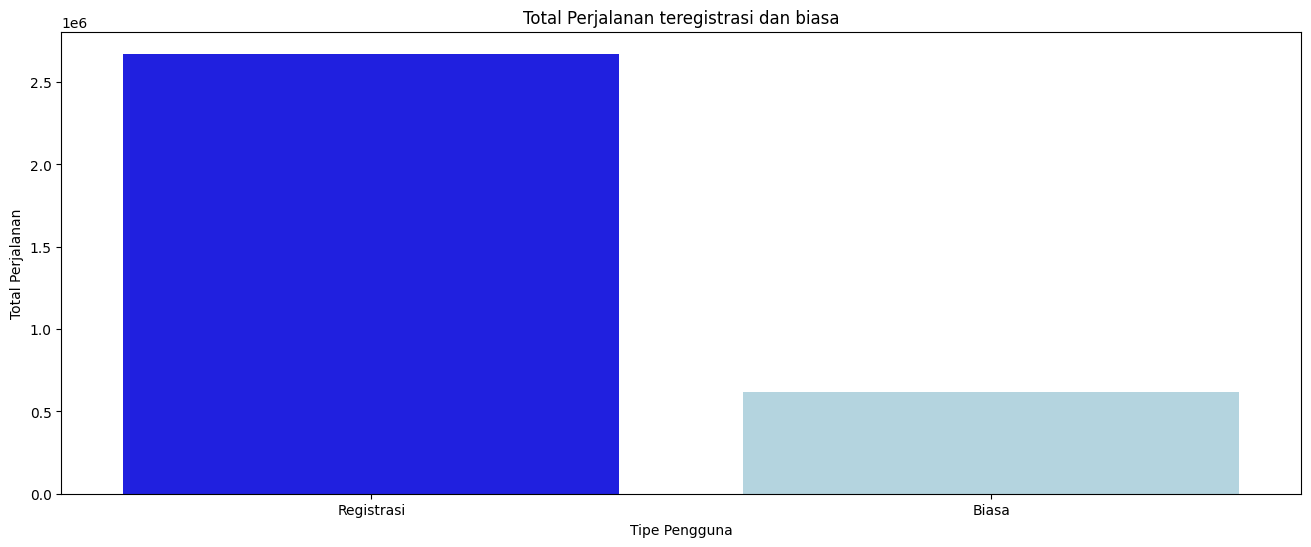

Jumlah pengguna yang teregistrasi: 2672662
Jumlah pengguna biasa: 620017


In [26]:
registered_sum = hour_df['registered'].sum()
casual_sum = hour_df['casual'].sum()

plt.figure(figsize=(16,6))

# bar chart dengan plt.bar
sns.barplot(x=["Registrasi", "Biasa"], y=[registered_sum, casual_sum],  palette=["blue", "lightblue"])

# label dan judul pada plot
plt.xlabel("Tipe Pengguna")
plt.ylabel("Total Perjalanan")
plt.title("Total Perjalanan teregistrasi dan biasa")

# Show the plot
plt.show()

print(f"Jumlah pengguna yang teregistrasi: {registered_sum}")
print(f"Jumlah pengguna biasa: {casual_sum}")

Jumlah pengguna teregistrasi lebih banyak dari pengguna biasa.

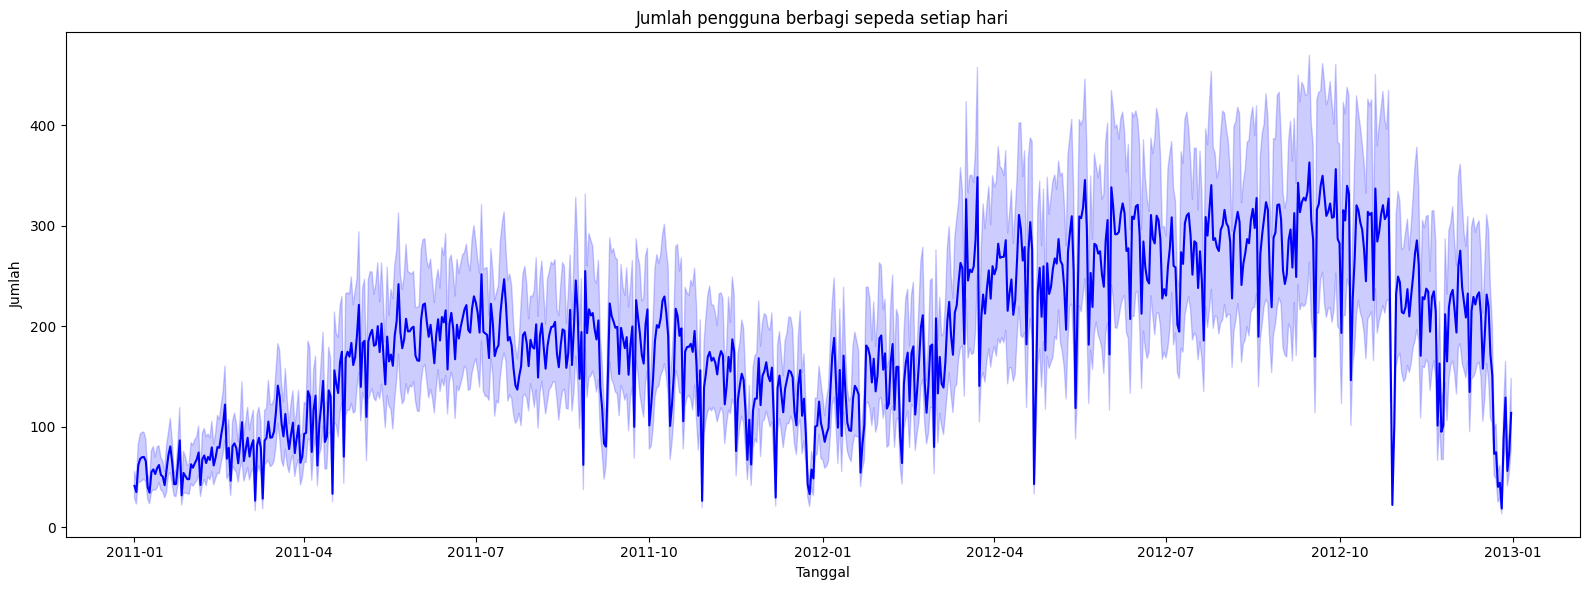

In [27]:
plt.figure(figsize=(16,6))

# grafik garis dengan sns.lineplot() function
sns.lineplot(x="dteday", y="cnt", data=hour_df, color='blue')

# label dan judul plot
plt.xlabel("Tanggal")
plt.ylabel("Jumlah")
plt.title("Jumlah pengguna berbagi sepeda setiap hari")

# Show the plot
plt.tight_layout()
plt.show()

Jumlah perjalanan awalnya rendah di awal tahun 2011 dan 2012, namun mengalami peningkatan di pertengahan tahun dan kemudian berkurang menjelang akhir tahun.
Jumlah pengguna tahun 2012 terlihat lebih banyak dari pada tahun 2011.

Boxplot Pengguna berbagi sepeda berdasarkan tipe

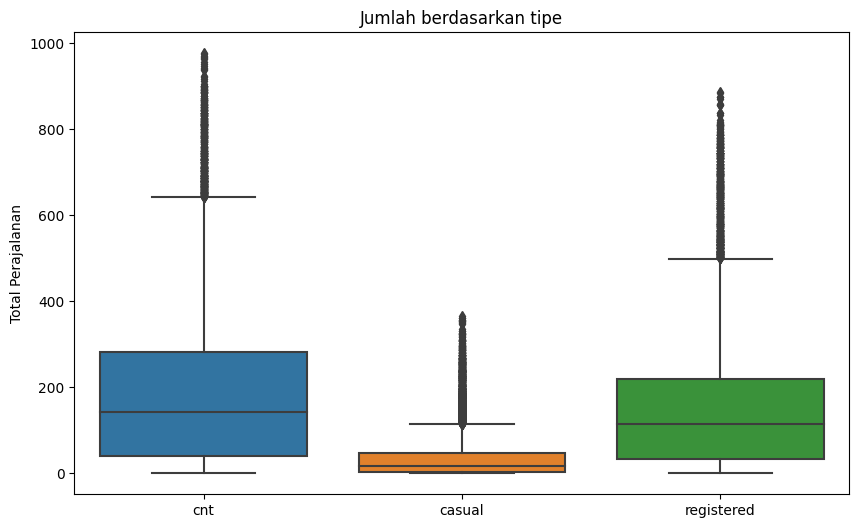

In [28]:
plt.figure(figsize=(10,6))

sns.boxplot(data=hour_df[['cnt', 'casual', 'registered']])

# label dan judul plot
plt.ylabel("Total Perajalanan")
plt.title("Jumlah berdasarkan tipe")

# Show the plot
plt.show()

Boxplot pengguna berbagi sepeda per tahun

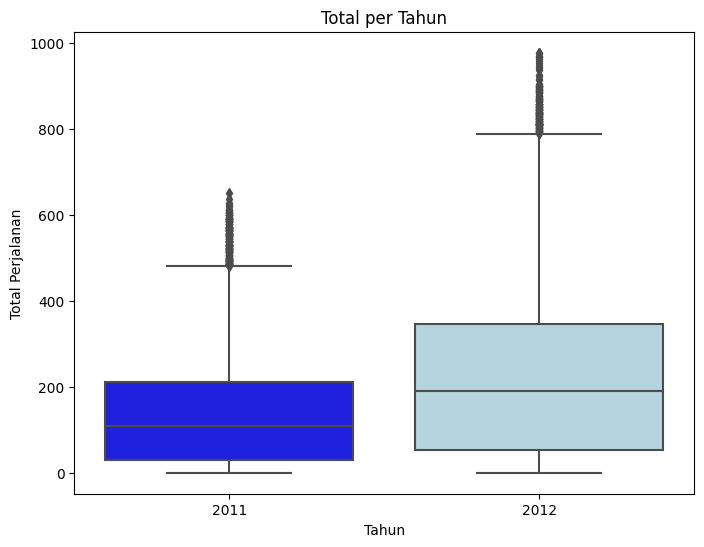

In [29]:
plt.figure(figsize=(8,6))

# membuat boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="yr",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# judul dan label pada plot
plt.xlabel("Tahun")
plt.ylabel("Total Perjalanan")
plt.title("Total per Tahun")

# Show the plot
plt.show()

Boxplots pengguna berdasarkan musim

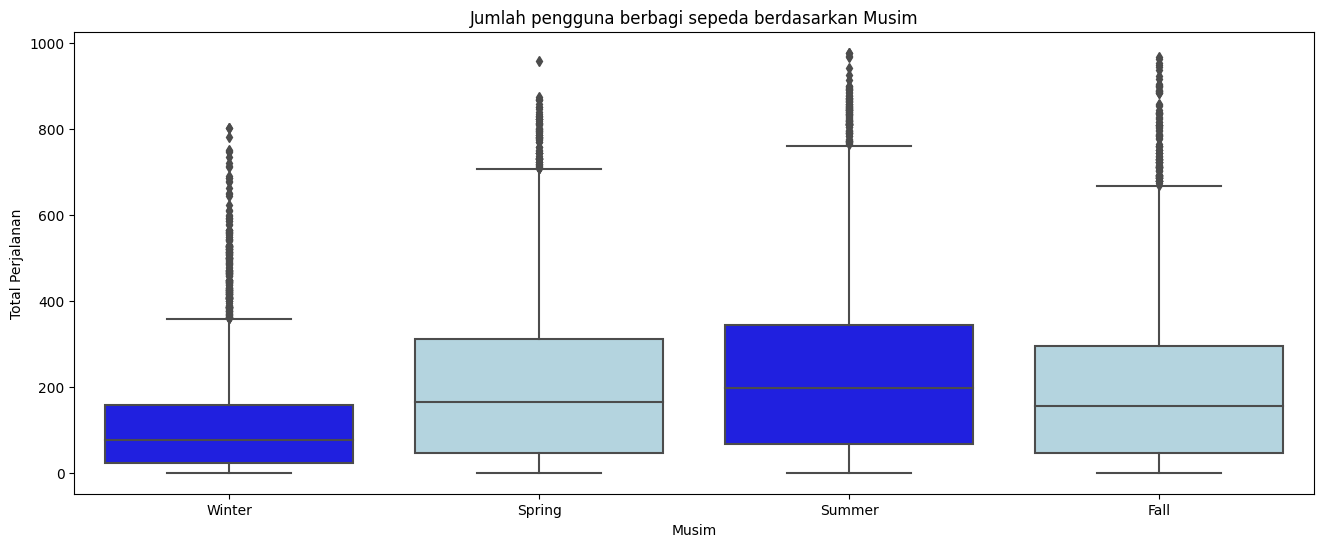

In [30]:
plt.figure(figsize=(16,6))

# membuat boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="season",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# label dan judul plot
plt.xlabel("Musim")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah pengguna berbagi sepeda berdasarkan Musim")

# Show the plot
plt.show()

Jumlah perjalanan berbagi sepeda paling sedikit pada musim dingin dan paling tinggi di musim panas.

Grafik Boxplots bagi pengguna sepeda berdasarkan bulan

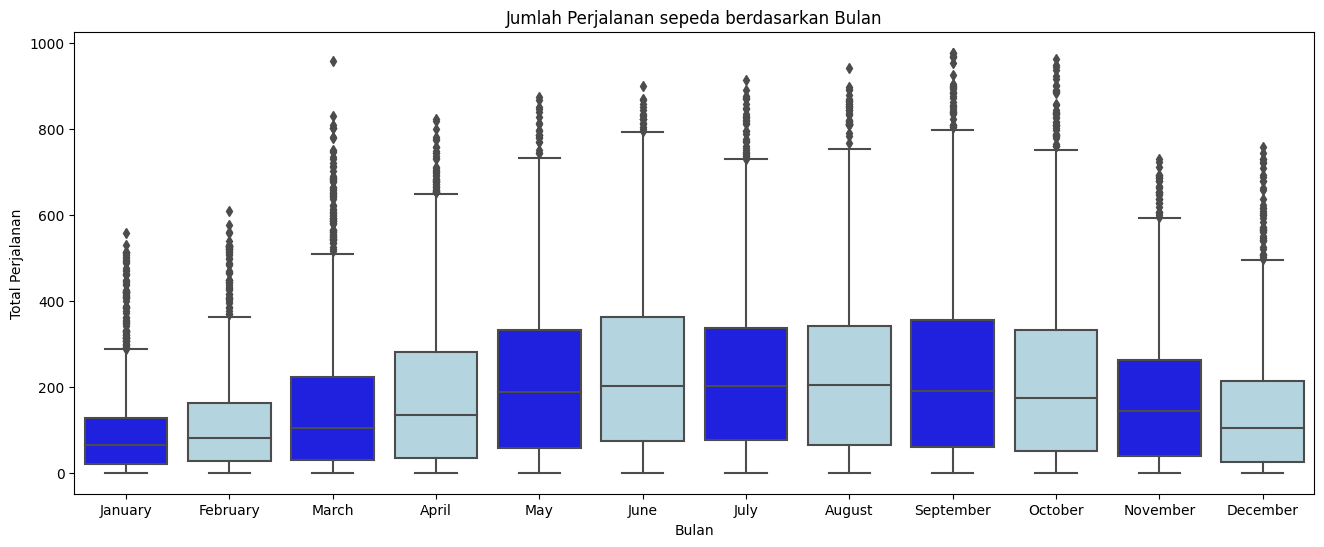

In [31]:
plt.figure(figsize=(16,6))

# grafik boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="mnth",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# label dan judul plot
plt.xlabel("Bulan")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Perjalanan sepeda berdasarkan Bulan")

# Show the plot
plt.show()

Seperti pada grafik garis sebelumnya dan diperjelas dengan boxplot, jumlah perjalanan sepeda cenderung meningkat di pertengahan tahun , dan menurun di awal tahun (January dan February) dan di akhir tahun (November dan December)

Boxplots Pengguna Berbagi sepeda per minggu

In [32]:
#urutan hari
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

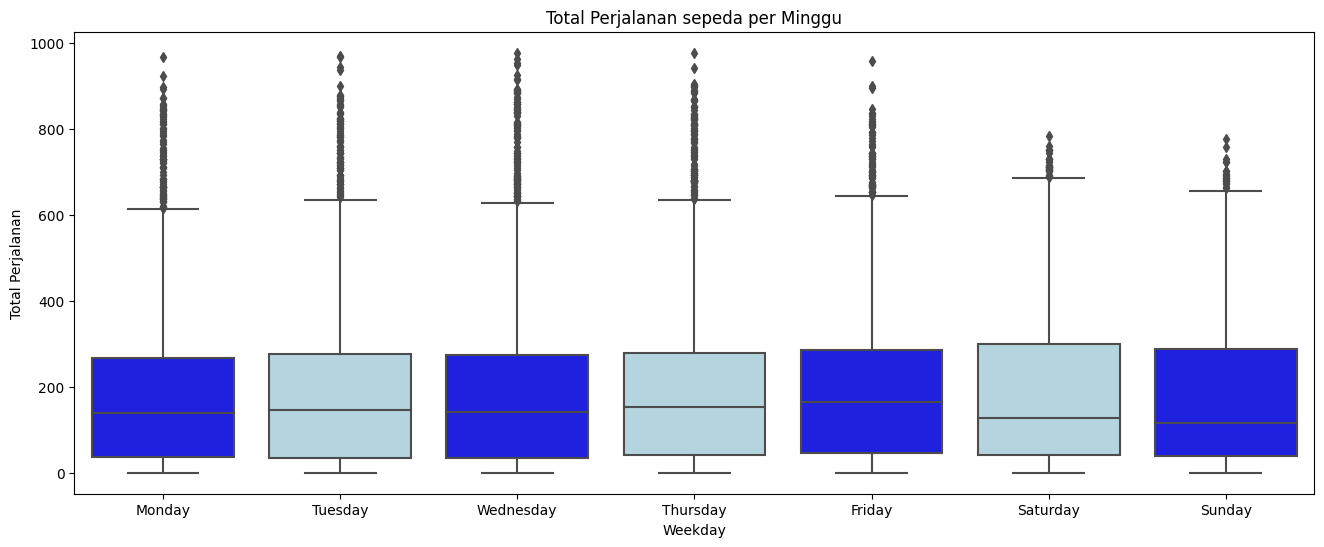

In [33]:
plt.figure(figsize=(16,6))

# membuat boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="weekday",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"],
    order=day_order
)

# Label dan Judul
plt.xlabel("Weekday")
plt.ylabel("Total Perjalanan")
plt.title("Total Perjalanan sepeda per Minggu")

# Show the plot
plt.show()

Boxplots menunjukkan hasil yang serupa pada weekday.
Tidak ada outlier pada hari Sabtu atau Minggu yg signifikan.

Boxplots pengguna sepeda berdasarkan jam

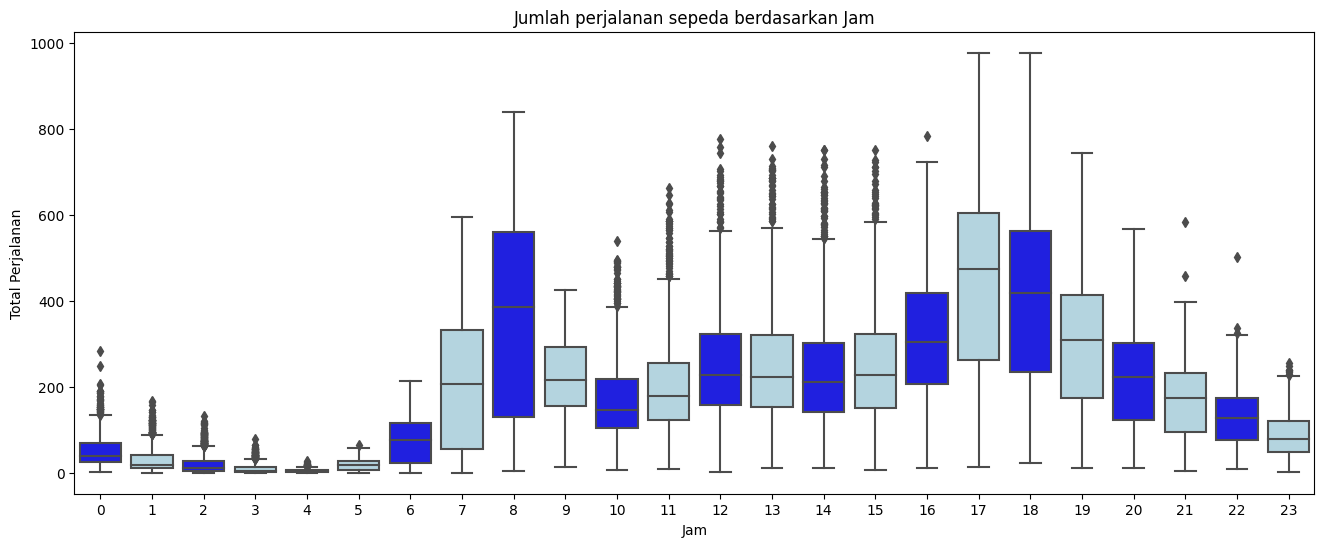

In [34]:
plt.figure(figsize=(16,6))

# boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="hr",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# judul dan label plot
plt.xlabel("Jam")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah perjalanan sepeda berdasarkan Jam")

# Show the plot
plt.show()


Dari tengah malam higga subuh, jumlah penggunaan terkecil.
Meningkat di pagi hari,dan puncaknya pda pukul 8.00
Kemudian menurun lagi setelahnya, namun mulai pukul 16.00 mengalami peningkatan dan puncaknya pada pukul 17.00
Setelahnya berkurang hari sepanjang malam

Boxplots untuk pengguna sepeda berdasarkan hari libur

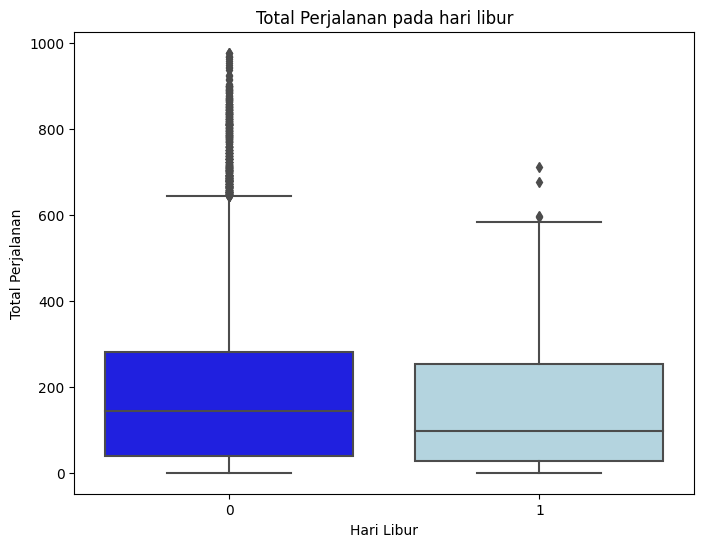

Total Pengguna sepeda berdasarkan hari libur:
0    16879
1      500
Name: holiday, dtype: int64


In [35]:
plt.figure(figsize=(8,6))

# membuat boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="holiday",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# Lable dan Judul plot
plt.xlabel("Hari Libur")
plt.ylabel("Total Perjalanan")
plt.title("Total Perjalanan pada hari libur")

# Show the plot
plt.show()

print('Total Pengguna sepeda berdasarkan hari libur:')
print(hour_df['holiday'].value_counts())

Jumlah perjalanan sepeda pada hari biasa lebih banyak dari pada hari libur, dapat dimengerti karena jumlah hari libur lebih sedikit dari pada hari biasa.

Boxplot pengguna sepeda di hari kerja

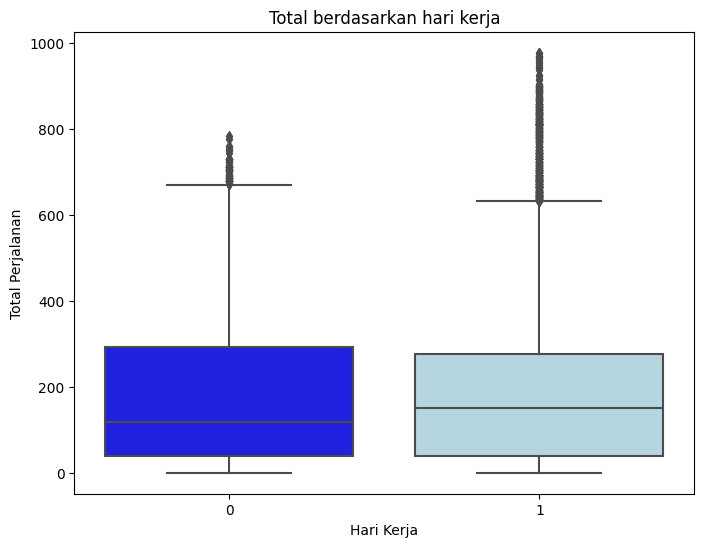

Jumlah pengguna berdasarkan hari kerja :
1    11865
0     5514
Name: workingday, dtype: int64


In [36]:
plt.figure(figsize=(8,6))

# boxplot menggunakan sns.boxplot() function
sns.boxplot(
    x="workingday",
    y="cnt",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# Judul dan label plot
plt.xlabel("Hari Kerja")
plt.ylabel("Total Perjalanan")
plt.title("Total berdasarkan hari kerja")

# Show the plot
plt.show()

print('Jumlah pengguna berdasarkan hari kerja :')
print(hour_df['workingday'].value_counts())

Jumlah perjalanan saat hari kerja lebih banyak daripada hari libur, karena hari kerja lebih banyak dari pada hari libur

Scatterplot untuk temperature, feeling temperature, humidity dan windspeed vs. jumlah pengguna sepeda

In [37]:
# mengektraksi varibale untuk scatterplot
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = hour_df[scatter_vars]

df_scatter.head(3)

,cnt,temp,atemp,hum,windspeed
0,16,9.84,14.395,81.0,0.0
1,40,9.02,13.635,80.0,0.0
2,32,9.02,13.635,80.0,0.0


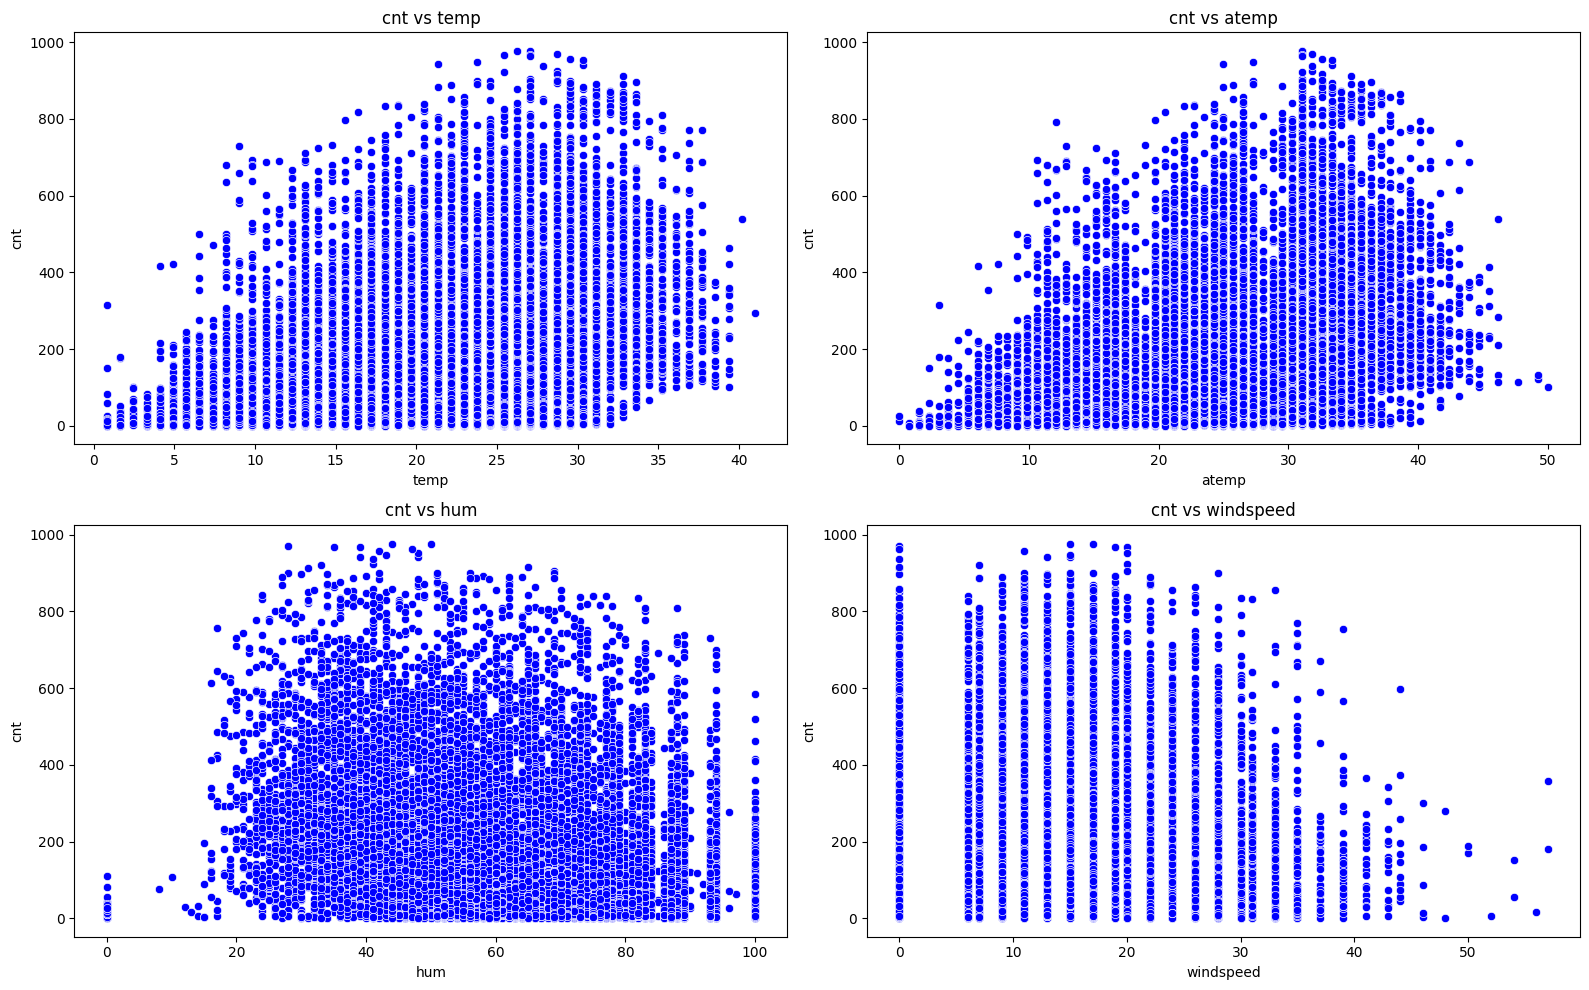

In [38]:
# membuat gambar dengan 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# iterasi variabel lainnya dan membuat scatterplot untuk masing-masing
for i, col in enumerate(hour_df.columns[10:14]):
    sns.scatterplot(x=col, y='cnt', data=hour_df, ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'cnt vs {col}')

# layout subplot
plt.tight_layout()

# Show the plot
plt.show()

grafik scatter plot cnt vs. temp and cnt vs. atemp menunjukkan bahwa perjalanan meningkat ketika suhu meningkat. Ini seperti ada hubungan antara suhu dengan jumlah perjalanan.
The scatter plot of hum vs. cnt tidak menunjukkan korelasi.
The scatter plot of cnt vs. windspeed menunjukkan bahwa jumlah perjalanan berkurang saan kecepatan angin meningkat.

Correlation dan Correlation Heat Map

In [39]:
hour_df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<Axes: >

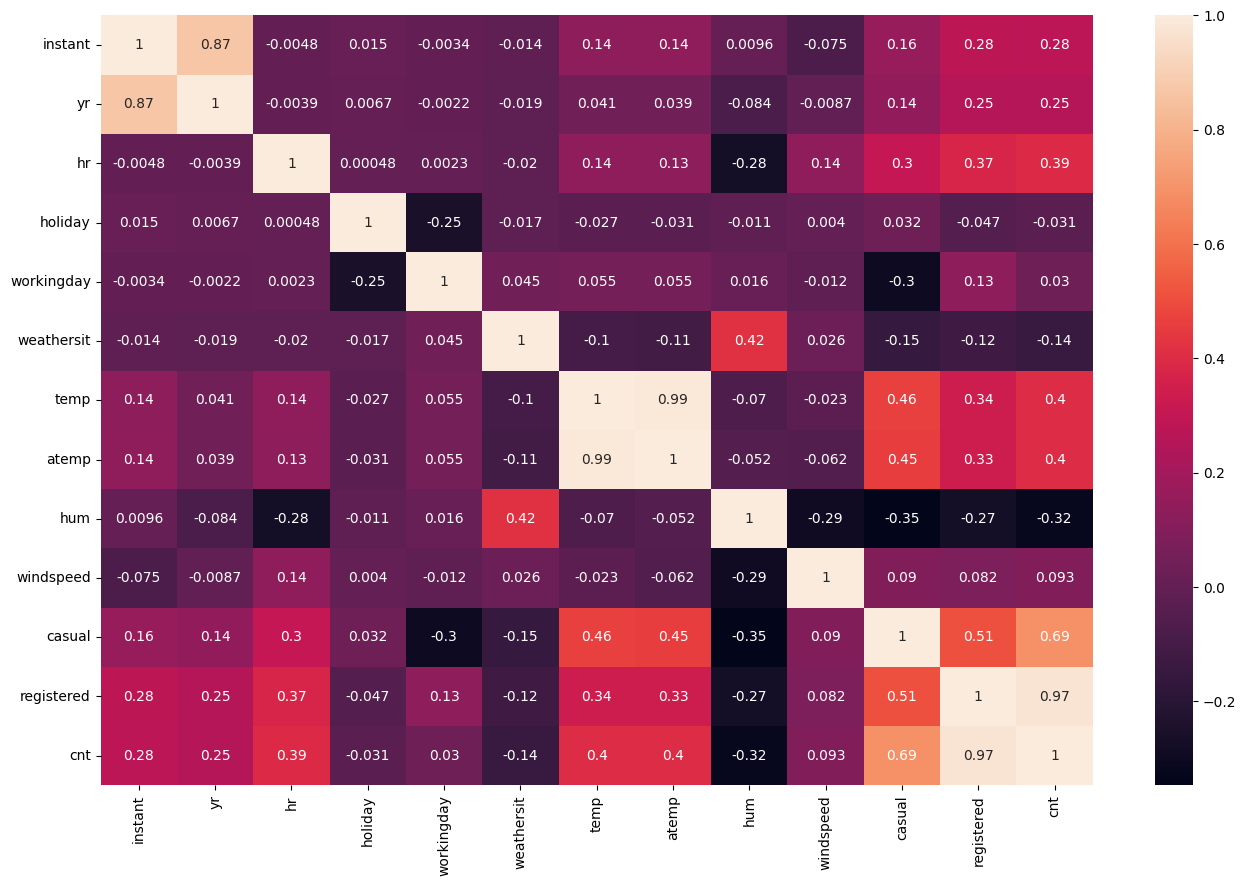

In [40]:
plt.figure(figsize=(16, 10))
sns.heatmap(hour_df.corr(numeric_only=True), annot=True)

Terdapat korelasi yang kuat antara variabel casual dan registered vs. cnt, dapat diperkirakan karena peningkatan jumlah biasa dan yg terregistrasi akan mempengaruhi jumlah perjalanan secara langsung. Terdapat korelasi yang moderat antara hr, temp and atemp vs jumlah perjalanan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Dimusim apa paling banyak dan paling sedikit menggunakan program berbagi sepeda ?

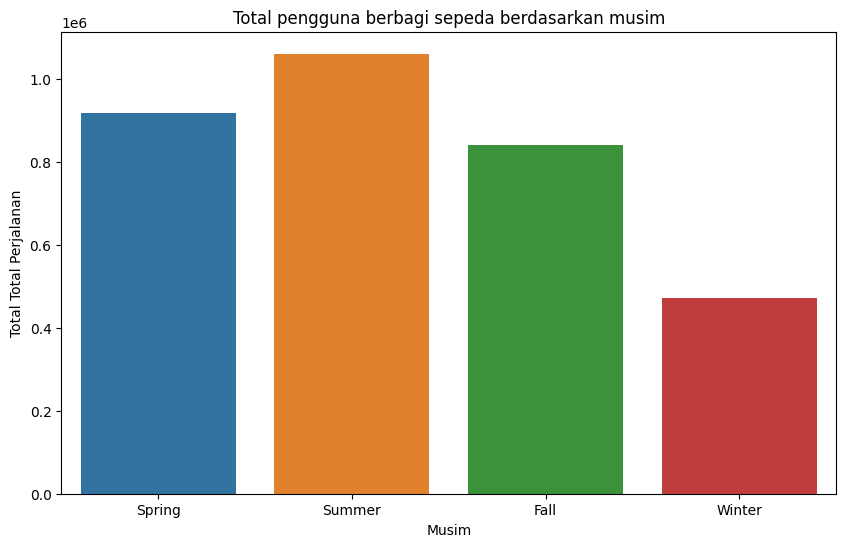

In [41]:
seasonly_users_df = hour_df.groupby("season").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

seasonly_users_df.head()
seasonly_users_df = seasonly_users_df.reset_index()
seasonly_users_df
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(10,6))
sns.barplot(x="season", y="cnt", data=seasonly_users_df, order=season_order)
plt.xlabel("Musim")
plt.ylabel("Total Total Perjalanan")
plt.title("Total pengguna berbagi sepeda berdasarkan musim")

plt.show()

- dapat terlihat bahwa pengguna paling banyak pada musim panas dan paling sedikit pada musim dingin

untuk melihat perbadingan antara pengendara biasa dan berbagi sepeda, unpivot terlebih dahulu seasonly_users_df

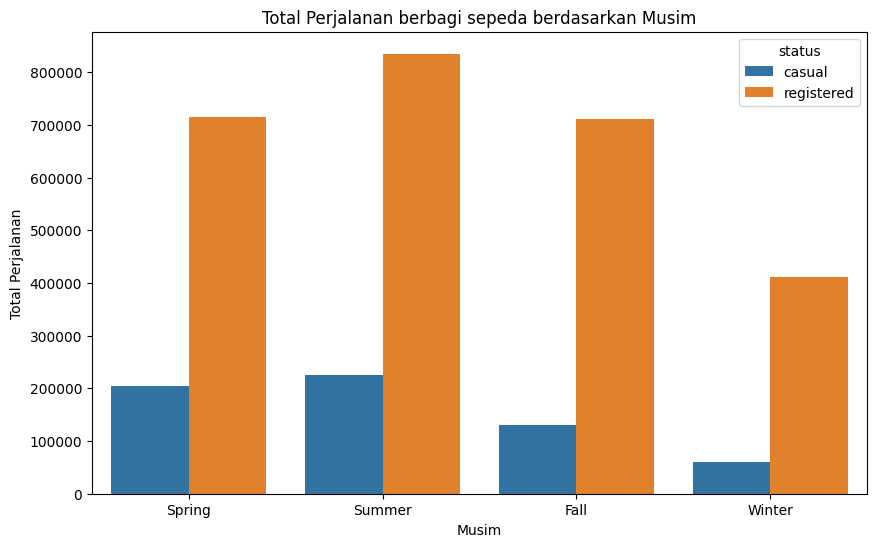

In [42]:
seasonly_users_df_unpivoted = pd.melt(seasonly_users_df,
                                      id_vars=['season'],
                                      value_vars=['casual', 'registered'],
                                      var_name='status',
                                      value_name='count')
seasonly_users_df_unpivoted
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='count', data=seasonly_users_df_unpivoted, order=season_order, hue='status')

plt.xlabel("Musim")
plt.ylabel("Total Perjalanan")
plt.title("Total Perjalanan berbagi sepeda berdasarkan Musim")

plt.show()

Insight
- Jumlah perjalanan sepeda tertinggi pada musim panas dan terendah pada musim dingin
- tidak ada perbedaan yang signifikan antara pengguna biasa dan teregistrasi pada semua musim, keduanya paling banyak pada musim panas dan paling sedikit pada musim dingin

### Pertanyaan 2:

Pada Jam berapa terdapat banyak pengendara sepeda ?

In [54]:
hourly_pengguna_df = hour_df.groupby("hr").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

hourly_pengguna_df.head()


,casual,registered,cnt
hr,,,
0,7375,31755,39130
1,4709,19455,24164
2,3412,12940,16352
3,1893,6281,8174
4,874,3554,4428


In [56]:
hourly_pengguna_df = hourly_pengguna_df.reset_index()
hourly_pengguna_df.head()

,index,hr,casual,registered,cnt
0,0,0,7375,31755,39130
1,1,1,4709,19455,24164
2,2,2,3412,12940,16352
3,3,3,1893,6281,8174
4,4,4,874,3554,4428


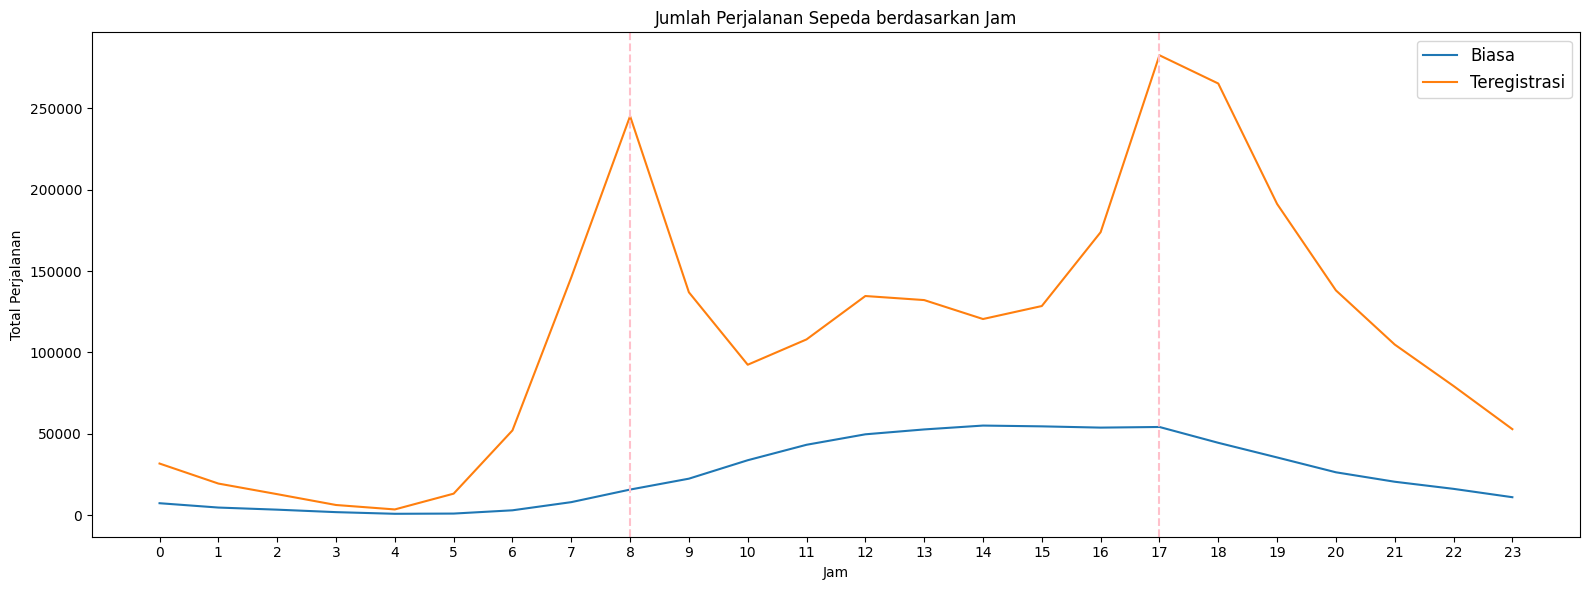

In [57]:
plt.figure(figsize=(16,6))

# grafik garis sns.lineplot() function
sns.lineplot(x="hr", y="casual", data=hourly_users_df, label='Biasa')
sns.lineplot(x="hr", y="registered", data=hourly_users_df, label='Teregistrasi')

# label dan judul plot
x = np.arange(0, 24, 1)
plt.xticks(x)

plt.xlabel("Jam")
plt.ylabel("Total Perjalanan")
plt.title("Jumlah Perjalanan Sepeda berdasarkan Jam")

# highlight data pada grafik
plt.axvline(x=8, color='pink', linestyle='--')
plt.axvline(x=17, color='pink', linestyle='--')

# legend plot
plt.legend(loc='upper right', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

**Insight**
1. Dari grafik diatas menunjukkan dengan jelas perbedaan pattern bagaimana perbedaan pengendara biasa dan yang teregistrasiberdasarkan jam dalam sehari.
2. Untuk pengguna teregistrasi mengalami puncaknya pada jam 08.00 dan 17.00. Kedua jam ini seperti waktu orang-orang untuk pergi dan pulang bekerja, sangat memungkinkan sepeda ini dipergunakan untuk transportasi sampai ke stasiun atau halte terdekat.
3. Di sisi lain, pengguna sepeda biasa menunjukkan penggunaan yang hampir sama dari pagi hingga menjelang sore, kemudian menurun setelah jam 17.00.

### Pertanyaan 3:

Apakah cuaca mempengaruhi orang-orang untuk mengendarai sepeda ?

berikut ini kategori cuaca yang disebutkan di awal :
- 1: Cerah, Sedikit Berawan, Sebagian Berawan, Sebagian Berawan
- 2: Sedikit Berkabut + Berawan, Sedikit Berkabut + Mendung, Sedikit Berkabut + Sedikit Berawan, Sedikit Berkabut
- 3: Bersalju Ringan, Hujan Ringan + Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
- 4: Hujan Lebat + Es + Petir + Berkabut, Bersalju + Berkabut

In [44]:
weatherly_pengguna_df = hour_df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

weatherly_pengguna_df

,casual,registered,cnt
weathersit,,,
1,462745,1875428,2338173
2,134481,661471,795952
3,22783,135548,158331
4,8,215,223


In [47]:
weatherly_pengguna_df = weatherly_pengguna_df.reset_index()
weatherly_pengguna_df

,index,weathersit,casual,registered,cnt
0,0,1,462745,1875428,2338173
1,1,2,134481,661471,795952
2,2,3,22783,135548,158331
3,3,4,8,215,223


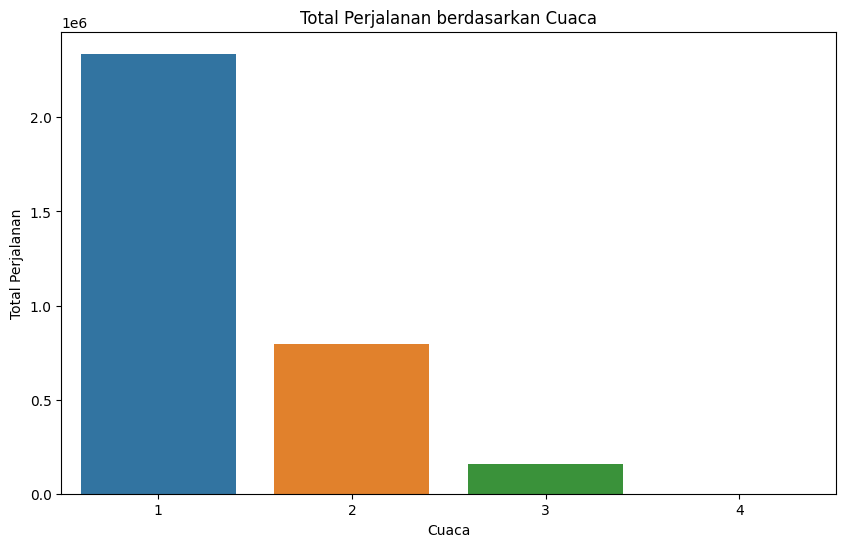

In [49]:
plt.figure(figsize=(10,6))

sns.barplot(x="weathersit", y="cnt", data=weatherly_pengguna_df)

plt.xlabel("Cuaca")
plt.ylabel("Total Perjalanan")
plt.title("Total Perjalanan berdasarkan Cuaca")

plt.show()

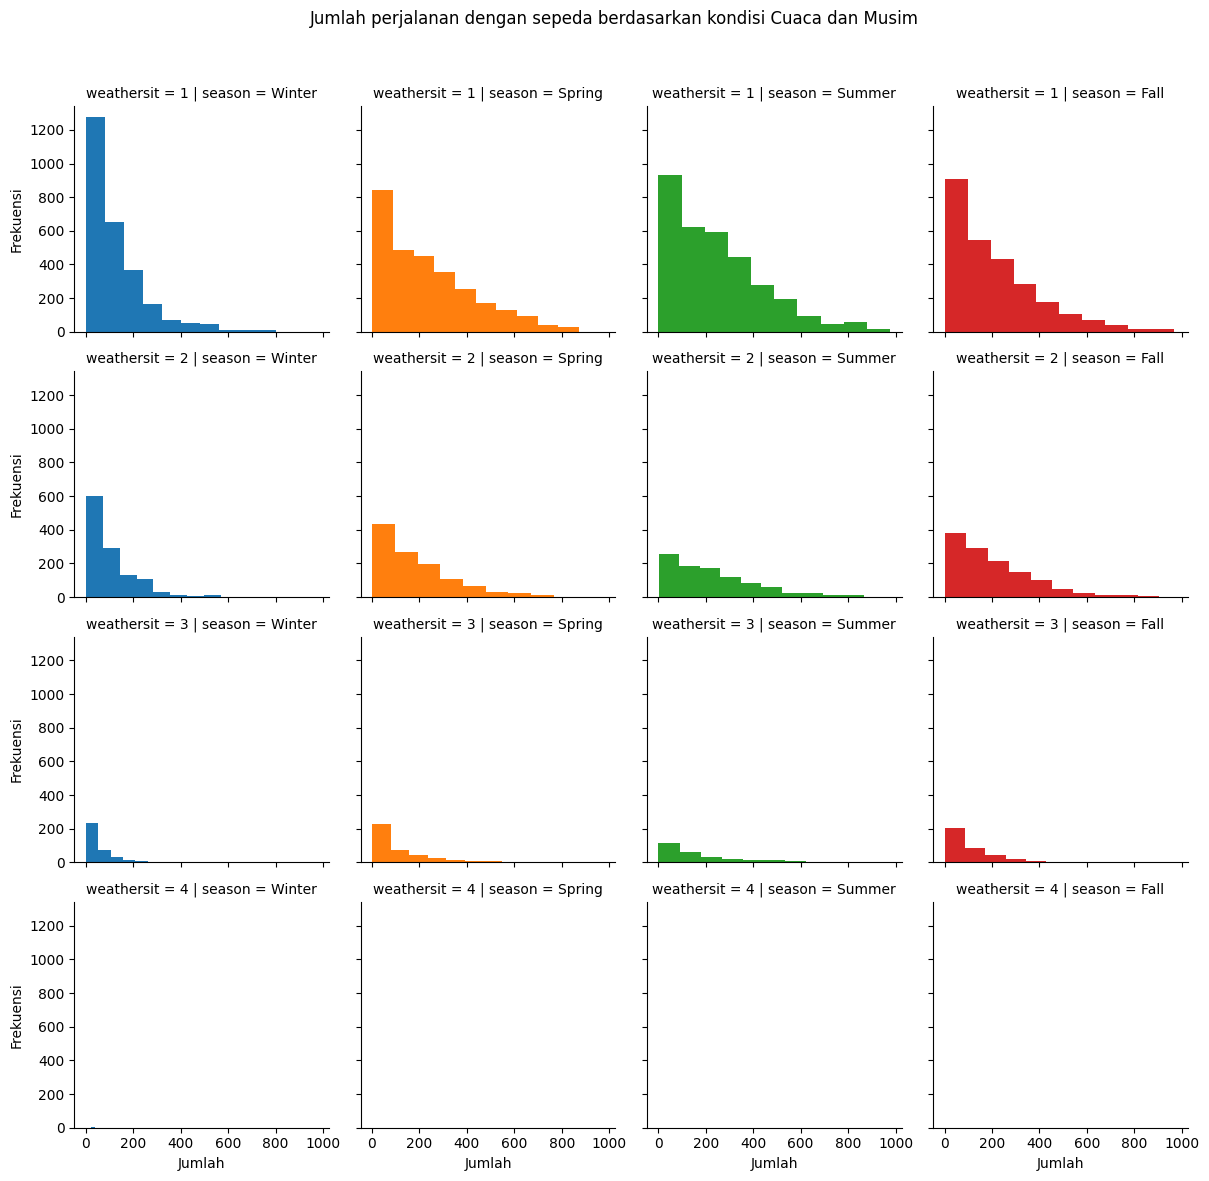

In [51]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context(font_scale=0.9)

g = sns.FacetGrid(data=hour_df,
               col='season',
               row='weathersit',hue='season')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Jumlah perjalanan dengan sepeda berdasarkan kondisi Cuaca dan Musim')

g.set_xlabels('Jumlah')
g.set_ylabels('Frekuensi')

plt.show()

**Insight**
1. Jumlah perjalanan sepeda banyak dipengaruhi oleh kondisi cuaca. Ada perbedaan signifikan antara cuaca hujan lebat dan guntur dengan cuaca yang lebih baik.
2. Kondisi ini berlaku untuk semua musim.

## Conclusion

- Program berbagi sepeda ini paling sering ditemukan pada musim panas dan paling sedikit pada musim dingin.
- Untuk pengguna teregistrasi mengalami puncaknya pada jam 08.00 dan 17.00. Diperkirakan sepeda dipergunakan oleh pekerja sebagai sarana transportasi sampai ke stasiun atau halte terdekat.
- Untuk pengguna sepeda biasa menunjukkan penggunaan yang hampir sama dari pagi hingga menjelang sore, kemudian menurun setelah jam 17.00.
- Jumlah perjalanan lebih banyak dilakukan saat cuaca cerah daripada kondisi cuaca ekstrem.

In [63]:
data_clean = 'data.csv'
hour_df.to_csv(data_clean, index=False)